In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv(r"C:\Users\krris\Desktop\XLRI-Cricket\Final datasets(Parma)\batting.csv", sep=',')

C:\Users\krris\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,names,runs,mins,BF,fours,sixes,SR,inns,opposition,Ground,SDate,year
0,JH Edrich (ENG),82,150,119,4,0,68.9,1,v Australia,Melbourne,05-Jan-71,1971
1,IM Chappell (AUS),60,132,103,5,1,58.25,2,v England,Melbourne,05-Jan-71,1971
2,KD Walters (AUS),41,59,51,6,0,80.39,2,v England,Melbourne,05-Jan-71,1971
3,WM Lawry (AUS),27,51,49,0,0,55.1,2,v England,Melbourne,05-Jan-71,1971
4,KWR Fletcher (ENG),24,60,47,1,0,51.06,1,v Australia,Melbourne,05-Jan-71,1971


In [5]:
unique_years=df.year.unique()

In [6]:
unique_years

array([1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018], dtype=int64)

In [7]:
df['SR']=df['SR'].astype(str)

In [8]:
df=df[df.SR!='-']

In [9]:
df['SR']=df['SR'].astype(float)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69667 entries, 0 to 70456
Data columns (total 12 columns):
names         69667 non-null object
runs          69667 non-null object
mins          69667 non-null object
BF            69667 non-null int64
fours         69667 non-null object
sixes         69667 non-null object
SR            69667 non-null float64
inns          69667 non-null int64
opposition    69667 non-null object
Ground        69667 non-null object
SDate         69667 non-null object
year          69667 non-null int64
dtypes: float64(1), int64(3), object(8)
memory usage: 6.9+ MB


In [11]:
average1=pd.Series()
for i in unique_years:
    temp_df=df[df.year==i]
    total_sr=sum(temp_df.SR)
    avg=total_sr/len(temp_df)
    average1=average1.append(pd.Series([avg]))

In [12]:
SR_df=pd.DataFrame({'year': unique_years, 'average_SR': average1})

In [13]:
from matplotlib.pyplot import *

Text(0,0.5,'Average Strike Rate')

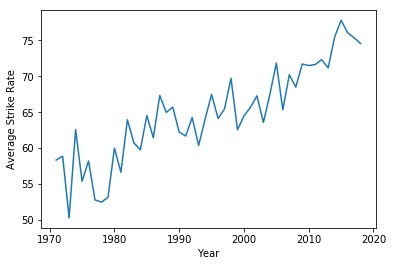

In [28]:
matplotlib.pyplot.plot(SR_df.year, SR_df.average_SR)
matplotlib.pyplot.xlabel("Year")
matplotlib.pyplot.ylabel("Average Strike Rate")

In [15]:
#removing NA values from 'fours' column
df['fours']=df['fours'].astype('str')
df=df[df.fours!='-']
df['fours']=df['fours'].astype('int')

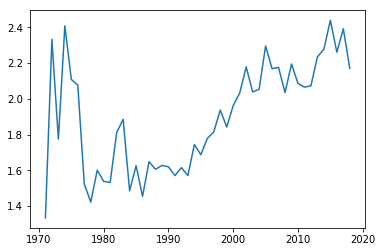

In [16]:
average_fours=pd.Series()
for i in unique_years:
    temp_df=df[df.year==i]
    total_sr=sum(temp_df.fours)
    avg=total_sr/len(temp_df)
    average_fours=average_fours.append(pd.Series([avg]))

SR_fours=pd.DataFrame({'year': unique_years, 'average_fours': average_fours})
matplotlib.pyplot.plot(SR_fours.year, SR_fours.average_fours)
matplotlib.pyplot.xlabel("Year")
matplotlib.pyplot.ylabel("Average Fours")

In [17]:
#removing NA values 
df['sixes']=df['sixes'].astype('str')
df=df[df.sixes!='-']
df['sixes']=df['sixes'].astype('int')

Text(0,0.5,'Average Sixes')

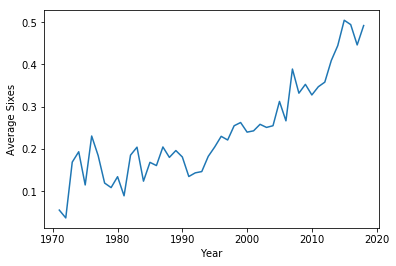

In [27]:
average_sixes=pd.Series()
for i in unique_years:
    temp_df=df[df.year==i]
    total_sr=sum(temp_df.sixes)
    avg=total_sr/len(temp_df)
    average_sixes=average_sixes.append(pd.Series([avg]))

df_sixes=pd.DataFrame({'year': unique_years, 'average_sixes': average_sixes})
matplotlib.pyplot.plot(df_sixes.year, df_sixes.average_sixes)
matplotlib.pyplot.xlabel("Year")
matplotlib.pyplot.ylabel("Average Sixes")

In [19]:
#removing '*' from scores
df['runs']=df['runs'].astype('str')
df['runs']=df['runs'].str.rsplit('*', expand=True, n=1)
df['runs']=df['runs'].astype('int')

Text(0,0.5,'Average 50+')

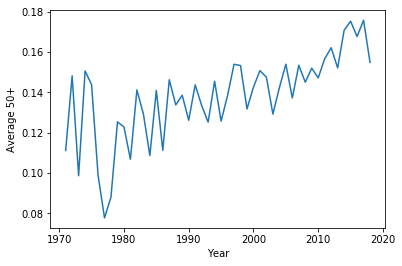

In [29]:
fifties=0
avg_fifties=pd.Series()
for i in unique_years:
    temp_df=df[df.year==i]
    temp_df=temp_df.reset_index(drop=True)
    fifties=0
    for j in range(0,len(temp_df)):
        if(temp_df.runs[j]>=50):
            fifties=fifties+1
    avg=fifties/len(temp_df)
    avg_fifties=avg_fifties.append(pd.Series([avg]))

df_fifties=pd.DataFrame({'year': unique_years, 'average_fifties': avg_fifties})
matplotlib.pyplot.plot(df_sixes.year, df_fifties.average_fifties)
matplotlib.pyplot.xlabel("Year")
matplotlib.pyplot.ylabel("Average 50+")


Text(0,0.5,'Average 100+')

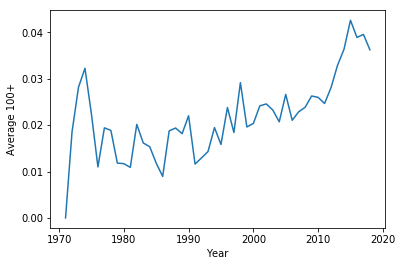

In [35]:
hundreds=0
avg_hundreds=pd.Series()
for i in unique_years:
    temp_df=df[df.year==i]
    temp_df=temp_df.reset_index(drop=True)
    hundreds=0
    for j in range(0,len(temp_df)):
        if(temp_df.runs[j]>=100):
            hundreds=hundreds+1
    avg=hundreds/len(temp_df)
    avg_hundreds=avg_hundreds.append(pd.Series([avg]))

df_hundreds=pd.DataFrame({'year': unique_years, 'average_hundreds': avg_hundreds})
matplotlib.pyplot.plot(df_sixes.year, df_hundreds.average_hundreds)
matplotlib.pyplot.xlabel("Year")
matplotlib.pyplot.ylabel("Average 100+")
